## Analyzing Police Activity .... By / Mohammed AGooR

Apply knowledge by answering interesting questions about a real dataset!, explore the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior, gain more practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. 

#### DataSet:
https://openpolicing.stanford.edu/

--------------------------

### 1- Preparing the data for analysis

Before beginning my analysis, it is critical that I first examine and clean the dataset, to make working with it a more efficient process. I will practice fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset.

In [1]:
# Import the pandas library as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

In [3]:
# Examine the head of the DataFrame
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           27918
driver_gender          1454
driver_race            1454
violation_raw          1454
violation              1454
search_conducted          0
search_type           26770
stop_outcome           1454
is_arrested            1454
stop_duration          1454
drugs_related_stop        0
district                  1
dtype: int64

#### Dropping cols

In [5]:
# Examine the shape of the DataFrame
ri.shape

(27918, 15)

In [6]:
# Drop the 'county_name' and 'state' columns
ri = ri.drop(['county_name', 'state'], axis=1)

In [7]:
# Examine the shape of the DataFrame (again)
ri.shape

(27918, 13)

#### Dropping Rows

In [8]:
# Count the number of missing values in each column
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          1454
driver_race            1454
violation_raw          1454
violation              1454
search_conducted          0
search_type           26770
stop_outcome           1454
is_arrested            1454
stop_duration          1454
drugs_related_stop        0
district                  1
dtype: int64

In [9]:
# Drop all rows that are missing 'driver_gender'
ri = ri.dropna(subset=['driver_gender'])

In [10]:
# Count the number of missing values in each column (again)
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           25316
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  1
dtype: int64

In [11]:
# Examine the shape of the DataFrame
ri.shape

(26464, 13)

#### Fixing Datatype

In [12]:
# Examine the head of the 'is_arrested' column
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [13]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [14]:
# Check the data type of 'is_arrested' 
ri['is_arrested'].dtype

dtype('bool')

#### Combining Objecct cols (stop_date & stop_time)

In [15]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [16]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [17]:
# Examine the data types of the DataFrame
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [18]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

#### Set the stop_datetime to index

In [19]:
# Set 'stop_datetime' as the index
ri = ri.set_index('stop_datetime')

In [20]:
# Examine the index
print(ri.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2008-08-07 10:04:00', '2008-08-07 10:27:00',
               '2008-08-07 10:30:00', '2008-08-07 10:35:00',
               '2008-08-07 10:45:00', '2008-08-07 11:59:00',
               '2008-08-07 12:14:00', '2008-08-07 16:21:00',
               '2008-08-07 16:21:00', '2008-08-07 19:11:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=26464, freq=None)


In [21]:
# Examine the columns
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

### 2- Exploring the relationship between gender and policing

Does the gender of a driver have an impact on police behavior during a traffic stop? to explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

#### Examine violation col

In [22]:
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               19713
Moving violation        3446
Equipment               1659
Registration/plates      833
Other                    813
Name: violation, dtype: int64

In [23]:
# Express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.744899
Moving violation       0.130215
Equipment              0.062689
Registration/plates    0.031477
Other                  0.030721
Name: violation, dtype: float64

#### comparing violation by driver_gender cols

In [24]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

In [25]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

In [26]:
# Compute the violations by female drivers (as proportions)
female.violation.value_counts(normalize=True)

Speeding               0.810072
Moving violation       0.097875
Equipment              0.040883
Registration/plates    0.028970
Other                  0.022201
Name: violation, dtype: float64

In [27]:
# Compute the violations by male drivers (as proportions)
male.violation.value_counts(normalize=True)

Speeding               0.719662
Moving violation       0.142737
Equipment              0.071133
Other                  0.034020
Registration/plates    0.032447
Name: violation, dtype: float64

#### Comparing speeding outcomes by gender

In [28]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.violation == 'Speeding') & (ri.driver_gender == 'F')]

In [29]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.violation == 'Speeding') & (ri.driver_gender == 'M')]

In [30]:
# Compute the stop outcomes for female drivers (as proportions)
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.981952
Warning             0.009024
Arrest Driver       0.006016
N/D                 0.002005
Arrest Passenger    0.000836
No Action           0.000167
Name: stop_outcome, dtype: float64

In [31]:
# Compute the stop outcomes for male drivers (as proportions)
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.967368
Arrest Driver       0.020322
Warning             0.008085
N/D                 0.001821
Arrest Passenger    0.001602
No Action           0.000801
Name: stop_outcome, dtype: float64

#### Calculating the search rate

In [32]:
# Check the data type of 'search_conducted'
ri.search_conducted.dtype

dtype('bool')

In [33]:
# Calculate the search rate by counting the values
ri.search_conducted.value_counts(normalize=True)

False    0.95662
True     0.04338
Name: search_conducted, dtype: float64

In [34]:
# Calculate the search rate by taking the mean
ri.search_conducted.mean()

0.04337968561064087

#### Comparing search rates by gender

In [35]:
# Calculate the search rate for both groups simultaneously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.022472
M    0.051476
Name: search_conducted, dtype: float64

In [36]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.102649
               Moving violation       0.059474
               Other                  0.060976
               Registration/plates    0.126168
               Speeding               0.009191
M              Equipment              0.105380
               Moving violation       0.088505
               Other                  0.112481
               Registration/plates    0.164782
               Speeding               0.030811
Name: search_conducted, dtype: float64

In [37]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.102649
                     M                0.105380
Moving violation     F                0.059474
                     M                0.088505
Other                F                0.060976
                     M                0.112481
Registration/plates  F                0.126168
                     M                0.164782
Speeding             F                0.009191
                     M                0.030811
Name: search_conducted, dtype: float64

#### Counting protective frisks

In [38]:
# Count the 'search_type' values
ri.search_type.value_counts()

Incident to Arrest                                          522
Probable Cause                                              189
Protective Frisk                                             90
Incident to Arrest,Inventory                                 66
Inventory                                                    63
Reasonable Suspicion                                         53
Incident to Arrest,Probable Cause                            33
Incident to Arrest,Protective Frisk                          28
Incident to Arrest,Inventory,Protective Frisk                18
Probable Cause,Protective Frisk                              17
Incident to Arrest,Inventory,Probable Cause                  12
Probable Cause,Reasonable Suspicion                          11
Protective Frisk,Reasonable Suspicion                        11
Inventory,Protective Frisk                                   10
Incident to Arrest,Probable Cause,Protective Frisk            8
Probable Cause,Protective Frisk,Reasonab

In [39]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [40]:
# Check the data type of 'frisk'
ri.frisk.dtype

dtype('bool')

In [41]:
# Take the sum of 'frisk'
ri.frisk.sum()

189

#### Comparing frisk rates by gender

In [42]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [43]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()

0.16463414634146342

In [44]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.108434
M    0.174134
Name: frisk, dtype: float64

### Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In to answer these and other questions by analyzing the dataset visually, since plots can help us to understand trends in a way that examining the raw data cannot.

#### Calculating the hourly arrest rate

In [45]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.04016777509068924

In [46]:
# Get the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.053026
1     0.077203
2     0.078335
3     0.058480
4     0.038961
5     0.000000
6     0.013699
7     0.016088
8     0.022026
9     0.022965
10    0.029768
11    0.028297
12    0.040664
13    0.027231
14    0.027635
15    0.038576
16    0.038425
17    0.048322
18    0.043478
19    0.038519
20    0.045572
21    0.085770
22    0.071499
23    0.048698
Name: is_arrested, dtype: float64

#### Plotting the hourly arrest rate

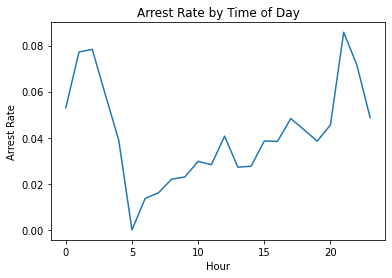

In [47]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#### Plotting drug-related stops

In [48]:
# Get the annual rate of drug-related stops   ## 'A' or 'Y' or 'y'
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# (===== equal =======)

# annual_drug_rate = ri.groupby(ri.index.year).drugs_related_stop.mean()

annual_drug_rate

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007738
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

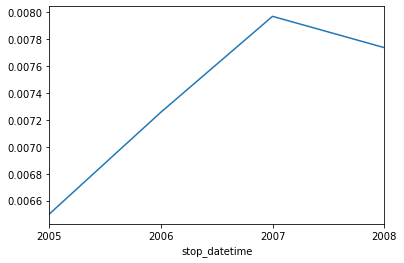

In [49]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#### Comparing drug and search rates

In [50]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.042558
Freq: A-DEC, Name: search_conducted, dtype: float64

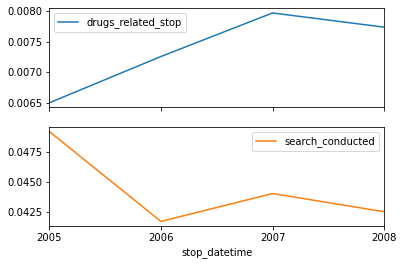

In [51]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

#### Tallying violations by district

In [52]:
# Save the frequency table as 'all_zones'
# Create a frequency table of districts and violations

all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,175,343,44,40,3180
Zone K2,251,558,135,154,3884
Zone K3,475,534,188,203,5211
Zone X1,45,200,20,5,404
Zone X3,168,578,124,108,3152
Zone X4,545,1233,301,323,3882


In [53]:
# Select rows 'Zone K1' through 'Zone K3'
# Save the smaller table as 'k_zones'

k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,175,343,44,40,3180
Zone K2,251,558,135,154,3884
Zone K3,475,534,188,203,5211


#### Plotting violations by district

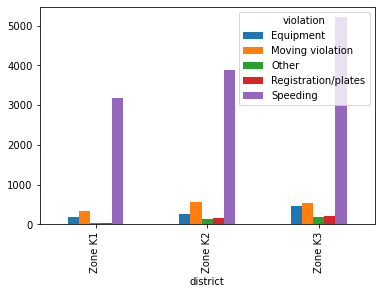

In [54]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

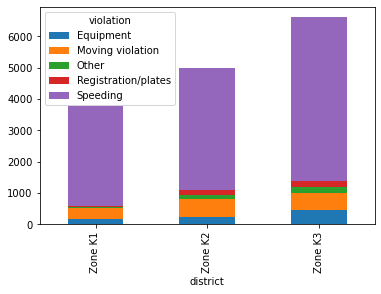

In [55]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

#### Converting stop durations to numbers

In [56]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [57]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [58]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [59]:
# Print the unique values in 'stop_minutes'
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

#### Plotting stop length

In [60]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
# Save the resulting Series as 'stop_length'

# Sort 'stop_length' by its values and create a horizontal bar plot

stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length = stop_length.sort_values()
stop_length

violation_raw
Speeding                            10.656318
Violation of City/Town Ordinance    13.548387
Equipment/Inspection Violation      14.384569
Other Traffic Violation             15.262914
Registration Violation              17.505402
Motorist Assist/Courtesy            17.923077
Special Detail/Directed Patrol      22.482517
Suspicious Person                   23.461538
APB                                 25.413793
Call for Service                    25.659763
Warrant                             26.000000
Name: stop_minutes, dtype: float64

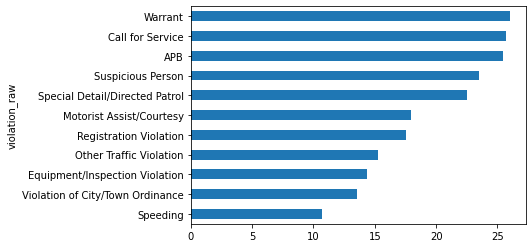

In [61]:
# Display the plot
stop_length.plot(kind='barh')
plt.show()

### Analyzing the effect of weather on policing

Using a second dataset to explore the impact of weather conditions on police behavior during traffic stops. merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and others

#### Plotting the temperature

In [62]:
# Read 'weather.csv' into a DataFrame named 'weather = '
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [63]:
# Describe the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


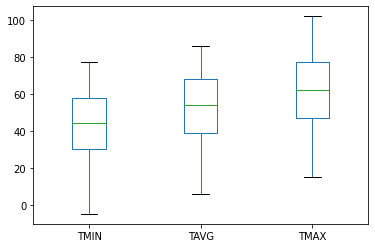

In [64]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

#### Plotting the temperature difference

In [65]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

In [66]:
# Describe the 'TDIFF' column
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

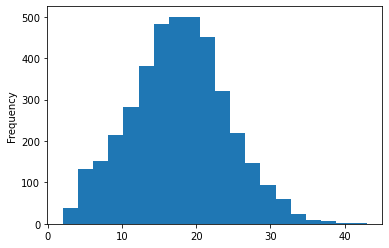

In [67]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show()

#### Counting bad weather conditions

In [68]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [69]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

In [70]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

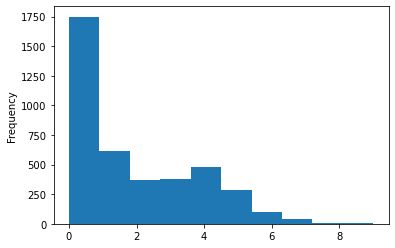

In [71]:
# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

#### Rating the weather conditions

In [72]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [73]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad',  3:'bad',  4:'bad',  5:'worse',  6:'worse', 7:'worse',
           8:'worse', 9:'worse'}

In [74]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [75]:
# Count the unweather['rating'] = weather.bad_conditions.map(mapping)ique values in 'rating'
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

#### Changing the data type to category

In [76]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [77]:
# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', cats)

In [78]:
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']

#### Preparing the DataFrames

In [79]:
# Reset the index of 'ri'
ri = ri.reset_index()
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [80]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


#### Merging the DataFrames


In [81]:
# Examine the shape of 'ri'
ri.shape

(26464, 16)

In [82]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [83]:
# Examine the shape of 'ri_weather'
ri_weather.shape

(26464, 18)

In [84]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather = ri_weather.set_index('stop_datetime')
ri_weather.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2005-02-24,bad


In [85]:
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


#### Comparing arrest rates by weather rating

In [86]:
# Calculate the overall arrest rate
ri_weather.is_arrested.mean()

0.04016777509068924

In [87]:
# Calculate the arrest rate for each 'rating'
ri_weather.groupby('rating').is_arrested.mean()

rating
bad      0.042070
good     0.036474
worse    0.044269
Name: is_arrested, dtype: float64

#### Selecting from a multi-indexed Series

In [88]:
# Get the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            bad       0.109606
                     good      0.079208
                     worse     0.132780
Moving violation     bad       0.096518
                     good      0.083333
                     worse     0.081905
Other                bad       0.171123
                     good      0.117857
                     worse     0.119497
Registration/plates  bad       0.158442
                     good      0.151899
                     worse     0.143939
Speeding             bad       0.017142
                     good      0.017962
                     worse     0.016143
Name: is_arrested, dtype: float64

In [89]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation','bad']

0.09651802076970067

In [90]:
# Print the arrest rates for speeding violations in all three weather conditions
arrest_rate.loc['Speeding']

rating
bad      0.017142
good     0.017962
worse    0.016143
Name: is_arrested, dtype: float64

#### Reshaping the arrest rate data

In [91]:
# Unstack the 'arrest_rate' Series into a DataFrame
arrest_rate.unstack()

rating,bad,good,worse
violation,,,
Equipment,0.109606,0.079208,0.132780
Moving violation,0.096518,0.083333,0.081905
Other,0.171123,0.117857,0.119497
Registration/plates,0.158442,0.151899,0.143939
Speeding,0.017142,0.017962,0.016143


In [92]:
# Create the same DataFrame using a pivot table
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,bad,good,worse
violation,,,
Equipment,0.109606,0.079208,0.132780
Moving violation,0.096518,0.083333,0.081905
Other,0.171123,0.117857,0.119497
Registration/plates,0.158442,0.151899,0.143939
Speeding,0.017142,0.017962,0.016143
